# Yelp Open Dataset Preprocessing

In [1]:
# import statements
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
# import reviews dataset
reviews_df = pd.read_csv('yelp_review.csv')

In [3]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5261668 entries, 0 to 5261667
Data columns (total 9 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   review_id    object
 1   user_id      object
 2   business_id  object
 3   stars        int64 
 4   date         object
 5   text         object
 6   useful       int64 
 7   funny        int64 
 8   cool         int64 
dtypes: int64(4), object(5)
memory usage: 361.3+ MB


In [4]:
reviews_df.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


In [5]:
# import reviews dataset
business_csv = pd.read_csv('yelp_business.csv')

In [88]:
business_list = business_csv.city.unique().tolist()
business_list

['Ahwatukee',
 'McMurray',
 'Phoenix',
 'Tempe',
 'Cuyahoga Falls',
 'Stuttgart',
 'Las Vegas',
 'Wexford',
 'Henderson',
 'Houston',
 'Chandler',
 'Markham',
 'Homestead',
 'Charlotte',
 'Toronto',
 'Peoria',
 'Sun Prairie',
 'Goodyear',
 'Richmond Hill',
 'Mesa',
 'Mississauga',
 'Elyria',
 'Fort Mill',
 'Montreal',
 'Munroe Falls',
 'Pineville',
 'Scottsdale',
 'Lakewood',
 'Davidson',
 'Cave Creek',
 'Frazer',
 'Madison',
 'Montréal',
 'Urbana',
 'Pittsburgh',
 'Surprise',
 'Cornelius',
 'Edinburgh',
 'Chesterland',
 'Glendale',
 'Mentor',
 'Cleveland',
 'Solon',
 'Concord',
 'Coraopolis',
 'Cleveland Heights',
 'Oakdale',
 'Gilbert',
 'Dorval',
 'Newmarket',
 'North Olmsted',
 'Willoughby',
 'Champaign',
 'Kent',
 'Gastonia',
 'Fitchburg',
 'Matthews',
 'Mirabel',
 'Rocky River',
 'North York',
 'Boulder City',
 'Vaughan',
 'North Las Vegas',
 'Tega Cay',
 'Scarborough',
 'Westlake',
 'Anthem',
 'Laval',
 'MESA',
 'Mint Hill',
 'Dunfermline',
 'Etna',
 'Bethel Park',
 'Laveen',
 '

Filter businesses according to city, review count and stars

In [8]:
# function to filter businesses according to city, review count and stars
def filter_business(df, city, review_count, stars):
    filtered_df = df[(df['city'] == city) & (df['categories'].str.contains("Restaurants"))
                               & (df['review_count'] > review_count)
                               & (df['stars'] >= stars)]
    return filtered_df

## Las Vegas Dataset Preprocessing

In [9]:
restaurants_lasvegas = filter_business(business_csv, city = 'Las Vegas', review_count = 2000, stars = 3)
restaurants_lasvegas

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
5068,G-5kEa6E6PD5fkBRuA7k9Q,"""Giada""",The Strip,"""The Cromwell Las Vegas Resort & Casino, 3595 ...",Las Vegas,NV,89109,36.115059,-115.172109,3.5,2349,1,Italian;Restaurants
6782,rcaPajgKOJC2vo_l3xa42A,"""Bouchon at the Venezia Tower""",The Strip,"""3355 Las Vegas Blvd S, Venezia Tower, 10th fl...",Las Vegas,NV,89109,36.120955,-115.169853,4.0,3570,1,Breakfast & Brunch;Venues & Event Spaces;Event...
10567,El4FC8jcawUVgw_0EIcbaQ,"""MGM Grand Hotel""",The Strip,"""3799 Las Vegas Blvd S""",Las Vegas,NV,89109,36.102251,-115.169968,3.0,3444,1,Restaurants;Arts & Entertainment;Hotels;Event ...
19191,f4x1YBxkLrZg652xt2KR5g,"""Hash House A Go Go""",The Strip,"""3535 Las Vegas Blvd""",Las Vegas,NV,89109,36.118181,-115.171580,4.0,4774,1,American (New);Restaurants;Breakfast & Brunch
20329,UPIYuRaZvknINOd1w8kqRQ,"""Monta Ramen""",Chinatown,"""5030 Spring Mountain Rd, Ste 6""",Las Vegas,NV,89146,36.127034,-115.209682,4.0,2291,1,Restaurants;Noodles;Ramen;Japanese
21006,eoHdUeQDNgQ6WYEnP2aiRw,"""Serendipity 3""",The Strip,"""Caesars Palace Las Vegas Hotel And Casino, 35...",Las Vegas,NV,89109,36.115670,-115.173317,3.0,3910,0,Social Clubs;Arts & Entertainment;American (Tr...
24586,XXW_OFaYQkkGOGniujZFHg,"""The Peppermill Restaurant & Fireside Lounge""",The Strip,"""2985 Las Vegas Blvd S""",Las Vegas,NV,89109,36.133667,-115.163095,4.0,2703,1,Bars;American (Traditional);Lounges;Nightlife;...
25096,iCQpiavjjPzJ5_3gPD5Ebg,"""Secret Pizza""",The Strip,"""The Cosmopolitan Of Las Vegas, 3708 Las Vegas...",Las Vegas,NV,89109,36.112372,-115.173064,4.0,3741,1,Pizza;Restaurants
27862,QJatAcxYgK1Zp9BRZMAx7g,"""Shake Shack""",The Strip,"""3790 Las Vegas Blvd S""",Las Vegas,NV,89109,36.103061,-115.173450,4.0,2549,1,Burgers;American (New);Restaurants
36120,HhVmDybpU7L50Kb5A0jXTg,"""Guy Fieri's Vegas Kitchen & Bar""",The Strip,"""3535 S Las Vegas Blvd""",Las Vegas,NV,89109,36.118080,-115.172432,3.5,2674,1,American (New);Burgers;Restaurants;Pubs;Nightl...


In [10]:
restaurants_lasvegas.neighborhood.unique()

array(['The Strip', 'Chinatown', 'Westside', nan, 'Southeast', 'Downtown',
       'Eastside'], dtype=object)

Check for unique categories in las vegas restaurants

In [11]:
restaurants_lasvegas.categories.tolist()

results = []

for i in restaurants_lasvegas.categories.tolist():
    results.extend(i.split(";"))
set(results)

{'African',
 'American (New)',
 'American (Traditional)',
 'Arts & Entertainment',
 'Asian Fusion',
 'Automotive',
 'Bakeries',
 'Barbeque',
 'Bars',
 'Beer',
 'Breakfast & Brunch',
 'British',
 'Buffets',
 'Burgers',
 'Cafes',
 'Car Dealers',
 'Casinos',
 'Caterers',
 'Cheesesteaks',
 'Chinese',
 'Dance Clubs',
 'Desserts',
 'Dim Sum',
 'Event Planning & Services',
 'Fish & Chips',
 'Food',
 'Food Delivery Services',
 'French',
 'Gastropubs',
 'Hotels',
 'Hotels & Travel',
 'Italian',
 'Japanese',
 'Korean',
 'Lounges',
 'Mexican',
 'Music Venues',
 'New Mexican Cuisine',
 'Nightlife',
 'Noodles',
 'Pizza',
 'Pubs',
 'Ramen',
 'Resorts',
 'Restaurants',
 'Salad',
 'Sandwiches',
 'Seafood',
 'Social Clubs',
 'Soul Food',
 'Soup',
 'Southern',
 'Steakhouses',
 'Tacos',
 'Tapas/Small Plates',
 'Tex-Mex',
 'Thai',
 'Venues & Event Spaces',
 'Vietnamese',
 'Wine & Spirits',
 'Wine Bars',
 'Wraps'}

We observe quite a lot of individual unique categories. We will need to filter them later.

Check for las vegas restaurants with NA values for categories

In [12]:
lasvegas_no_na_subset = restaurants_lasvegas[~restaurants_lasvegas['neighborhood'].isna()]
lasvegas_no_na_subset

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
5068,G-5kEa6E6PD5fkBRuA7k9Q,"""Giada""",The Strip,"""The Cromwell Las Vegas Resort & Casino, 3595 ...",Las Vegas,NV,89109,36.115059,-115.172109,3.5,2349,1,Italian;Restaurants
6782,rcaPajgKOJC2vo_l3xa42A,"""Bouchon at the Venezia Tower""",The Strip,"""3355 Las Vegas Blvd S, Venezia Tower, 10th fl...",Las Vegas,NV,89109,36.120955,-115.169853,4.0,3570,1,Breakfast & Brunch;Venues & Event Spaces;Event...
10567,El4FC8jcawUVgw_0EIcbaQ,"""MGM Grand Hotel""",The Strip,"""3799 Las Vegas Blvd S""",Las Vegas,NV,89109,36.102251,-115.169968,3.0,3444,1,Restaurants;Arts & Entertainment;Hotels;Event ...
19191,f4x1YBxkLrZg652xt2KR5g,"""Hash House A Go Go""",The Strip,"""3535 Las Vegas Blvd""",Las Vegas,NV,89109,36.118181,-115.171580,4.0,4774,1,American (New);Restaurants;Breakfast & Brunch
20329,UPIYuRaZvknINOd1w8kqRQ,"""Monta Ramen""",Chinatown,"""5030 Spring Mountain Rd, Ste 6""",Las Vegas,NV,89146,36.127034,-115.209682,4.0,2291,1,Restaurants;Noodles;Ramen;Japanese
21006,eoHdUeQDNgQ6WYEnP2aiRw,"""Serendipity 3""",The Strip,"""Caesars Palace Las Vegas Hotel And Casino, 35...",Las Vegas,NV,89109,36.115670,-115.173317,3.0,3910,0,Social Clubs;Arts & Entertainment;American (Tr...
24586,XXW_OFaYQkkGOGniujZFHg,"""The Peppermill Restaurant & Fireside Lounge""",The Strip,"""2985 Las Vegas Blvd S""",Las Vegas,NV,89109,36.133667,-115.163095,4.0,2703,1,Bars;American (Traditional);Lounges;Nightlife;...
25096,iCQpiavjjPzJ5_3gPD5Ebg,"""Secret Pizza""",The Strip,"""The Cosmopolitan Of Las Vegas, 3708 Las Vegas...",Las Vegas,NV,89109,36.112372,-115.173064,4.0,3741,1,Pizza;Restaurants
27862,QJatAcxYgK1Zp9BRZMAx7g,"""Shake Shack""",The Strip,"""3790 Las Vegas Blvd S""",Las Vegas,NV,89109,36.103061,-115.173450,4.0,2549,1,Burgers;American (New);Restaurants
36120,HhVmDybpU7L50Kb5A0jXTg,"""Guy Fieri's Vegas Kitchen & Bar""",The Strip,"""3535 S Las Vegas Blvd""",Las Vegas,NV,89109,36.118080,-115.172432,3.5,2674,1,American (New);Burgers;Restaurants;Pubs;Nightl...


In [13]:
lasvegas_na_subset = restaurants_lasvegas[restaurants_lasvegas['neighborhood'].isna()]
lasvegas_na_subset

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
89974,fL-b760btOaGa85OJ9ut3w,"""Rollin Smoke Barbeque""",NaN,"""3185 S Highland Dr, Ste 2""",Las Vegas,NV,89109,36.132188,-115.177096,4.5,2320,1,Restaurants;Soul Food;Burgers;Barbeque
123599,awI4hHMfa7H0Xf0-ChU5hg,"""Oyster Bar""",NaN,"""2411 W Sahara Ave""",Las Vegas,NV,89102,36.142782,-115.174747,4.5,2125,1,Restaurants;Bars;Seafood;Nightlife


Two restaurants have NaN values for neighborhood. We will use the lat long values to determine the closest neighborhood from the closest restaurant, and assign that neighborhoood to the restaurants. 

#### Fill NaN neighborhoods by searching the closest neighborhood from the restaurant

In [14]:
from geopy import distance

lasvegas_na_dict = lasvegas_na_subset.to_dict('records')
lasvegas_no_na_dict = lasvegas_no_na_subset.to_dict('records')

def get_closest_neighborhood(list_restaurants, location):
    # location is tuple of lat and long values
    closest_distance = 100
    closest_neighborhood = ""

    for i,r_dict in enumerate(list_restaurants):
        
        r_lat_long = (r_dict['latitude'], r_dict['longitude'])
        current_distance = distance.distance(location, r_lat_long).km

        # if current iteration of restaurant is closer 
        if current_distance < closest_distance:
            closest_distance = current_distance
            closest_neighborhood = r_dict['neighborhood']
        
    
    print(closest_distance)
    return closest_neighborhood
        

In [15]:
# fill na values with closest neighborhood
for na_rest in lasvegas_na_dict:
    location = (na_rest['latitude'], na_rest['longitude'])
    na_rest['neighborhood'] = get_closest_neighborhood(lasvegas_no_na_dict, location)

1.111766562931265
1.45696589845987


In [16]:
# convert back to datafram
restaurants_lasvegas = pd.DataFrame(lasvegas_na_dict+lasvegas_no_na_dict)
restaurants_lasvegas.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,fL-b760btOaGa85OJ9ut3w,"""Rollin Smoke Barbeque""",The Strip,"""3185 S Highland Dr, Ste 2""",Las Vegas,NV,89109,36.132188,-115.177096,4.5,2320,1,Restaurants;Soul Food;Burgers;Barbeque
1,awI4hHMfa7H0Xf0-ChU5hg,"""Oyster Bar""",The Strip,"""2411 W Sahara Ave""",Las Vegas,NV,89102,36.142782,-115.174747,4.5,2125,1,Restaurants;Bars;Seafood;Nightlife
2,G-5kEa6E6PD5fkBRuA7k9Q,"""Giada""",The Strip,"""The Cromwell Las Vegas Resort & Casino, 3595 ...",Las Vegas,NV,89109,36.115059,-115.172109,3.5,2349,1,Italian;Restaurants
3,rcaPajgKOJC2vo_l3xa42A,"""Bouchon at the Venezia Tower""",The Strip,"""3355 Las Vegas Blvd S, Venezia Tower, 10th fl...",Las Vegas,NV,89109,36.120955,-115.169853,4.0,3570,1,Breakfast & Brunch;Venues & Event Spaces;Event...
4,El4FC8jcawUVgw_0EIcbaQ,"""MGM Grand Hotel""",The Strip,"""3799 Las Vegas Blvd S""",Las Vegas,NV,89109,36.102251,-115.169968,3.0,3444,1,Restaurants;Arts & Entertainment;Hotels;Event ...


#### Shortlist categories that we want to extract from restaurants

In [17]:
category_cols = ['American',
       'Asian Fusion', 'Bakeries', 'Bars', 'Breakfast & Brunch', 'British',
       'Buffets', 'Burgers', 'Caribbean', 'Cafes', 'Caterers', 'Chinese',
       'Desserts', 'French', 'German', 'Gluten-Free', 'Indian', 'Hawaiian',
       'Italian', 'Japanese', 'Korean', 'Latin American', 'Mediterranean',
       'Mexican', 'Music Venues', 'Nightlife', 'Seafood', 'Salad', 'Spanish',
       'Thai', 'Vegan', 'Vegetarian', 'Vietnamese', 'Canadian']

In [18]:
restaurants_lasvegas['categories'].apply(lambda x: x.split(";"))

0           [Restaurants, Soul Food, Burgers, Barbeque]
1               [Restaurants, Bars, Seafood, Nightlife]
2                                [Italian, Restaurants]
3     [Breakfast & Brunch, Venues & Event Spaces, Ev...
4     [Restaurants, Arts & Entertainment, Hotels, Ev...
5     [American (New), Restaurants, Breakfast & Brunch]
6               [Restaurants, Noodles, Ramen, Japanese]
7     [Social Clubs, Arts & Entertainment, American ...
8     [Bars, American (Traditional), Lounges, Nightl...
9                                  [Pizza, Restaurants]
10               [Burgers, American (New), Restaurants]
11    [American (New), Burgers, Restaurants, Pubs, N...
12    [Bars, Restaurants, Asian Fusion, Dance Clubs,...
13    [New Mexican Cuisine, Mexican, Restaurants, So...
14    [Restaurants, Breakfast & Brunch, American (New)]
15           [Buffets, Breakfast & Brunch, Restaurants]
16              [Restaurants, American (New), Southern]
17                               [Buffets, Resta

In [19]:
original_list = restaurants_lasvegas['categories'].apply(lambda x: x.split(";")).tolist()

We want the categories "American (New)" and "American (Traditional)" to be included in the category "American" as well. 

In [20]:
original_list = [[s[:-6] if s.endswith('(New)') else s for s in sub_list] for sub_list in original_list]
original_list = [[s[:-14] if s.endswith('(Traditional)') else s for s in sub_list] for sub_list in original_list]
original_list = [list(set(sub_list)) for sub_list in original_list]

In [21]:
original_list

[['Restaurants', 'Barbeque', 'Soul Food', 'Burgers'],
 ['Nightlife', 'Bars', 'Restaurants', 'Seafood'],
 ['Restaurants', 'Italian'],
 ['Food',
  'Event Planning & Services',
  'Venues & Event Spaces',
  'Breakfast & Brunch',
  'Restaurants',
  'French',
  'Bakeries',
  'Cafes'],
 ['Casinos',
  'Hotels & Travel',
  'Event Planning & Services',
  'Restaurants',
  'Hotels',
  'Arts & Entertainment',
  'Resorts'],
 ['American', 'Breakfast & Brunch', 'Restaurants'],
 ['Ramen', 'Japanese', 'Restaurants', 'Noodles'],
 ['Social Clubs',
  'Food',
  'Desserts',
  'Restaurants',
  'Arts & Entertainment',
  'American'],
 ['Nightlife',
  'Bars',
  'Breakfast & Brunch',
  'Restaurants',
  'Lounges',
  'American'],
 ['Restaurants', 'Pizza'],
 ['American', 'Restaurants', 'Burgers'],
 ['Nightlife',
  'African',
  'Bars',
  'Breakfast & Brunch',
  'Restaurants',
  'Pubs',
  'American',
  'Burgers'],
 ['Nightlife',
  'Music Venues',
  'Bars',
  'Restaurants',
  'Lounges',
  'Dance Clubs',
  'Asian Fusion

In [22]:
# filter for only categories that fall in category_cols
final_list = []
for lst in original_list:

    newlst = [x for x in lst if x in category_cols]
    final_list.append(newlst)

In [23]:
restaurants_lasvegas['categories'] = final_list

In [24]:
restaurants_lasvegas.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,fL-b760btOaGa85OJ9ut3w,"""Rollin Smoke Barbeque""",The Strip,"""3185 S Highland Dr, Ste 2""",Las Vegas,NV,89109,36.132188,-115.177096,4.5,2320,1,[Burgers]
1,awI4hHMfa7H0Xf0-ChU5hg,"""Oyster Bar""",The Strip,"""2411 W Sahara Ave""",Las Vegas,NV,89102,36.142782,-115.174747,4.5,2125,1,"[Nightlife, Bars, Seafood]"
2,G-5kEa6E6PD5fkBRuA7k9Q,"""Giada""",The Strip,"""The Cromwell Las Vegas Resort & Casino, 3595 ...",Las Vegas,NV,89109,36.115059,-115.172109,3.5,2349,1,[Italian]
3,rcaPajgKOJC2vo_l3xa42A,"""Bouchon at the Venezia Tower""",The Strip,"""3355 Las Vegas Blvd S, Venezia Tower, 10th fl...",Las Vegas,NV,89109,36.120955,-115.169853,4.0,3570,1,"[Breakfast & Brunch, French, Bakeries, Cafes]"
4,El4FC8jcawUVgw_0EIcbaQ,"""MGM Grand Hotel""",The Strip,"""3799 Las Vegas Blvd S""",Las Vegas,NV,89109,36.102251,-115.169968,3.0,3444,1,[]


Now, the categories column is a list of categories, shortlisted from category_cols.

(array([31.,  0.,  2.,  0.,  2.,  0.,  1.,  0.,  1.,  1.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

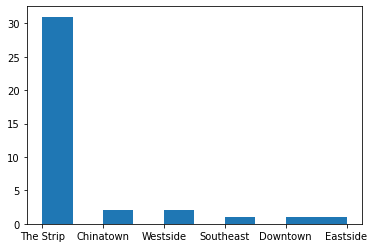

In [25]:
plt.hist(restaurants_lasvegas.neighborhood)

#### Convert categories column to dummy variables

In [26]:
dummy_df = pd.get_dummies(restaurants_lasvegas['categories'].apply(pd.Series).stack()).sum(level =0)

C:\Users\raych\AppData\Local\Temp\ipykernel_3952\4289670488.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dummy_df = pd.get_dummies(restaurants_lasvegas['categories'].apply(pd.Series).stack()).sum(level =0)
C:\Users\raych\AppData\Local\Temp\ipykernel_3952\4289670488.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  dummy_df = pd.get_dummies(restaurants_lasvegas['categories'].apply(pd.Series).stack()).sum(level =0)


In [27]:
restaurants_lasvegas = pd.concat([restaurants_lasvegas, dummy_df], axis = 1).drop(columns = 'categories')
restaurants_lasvegas.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,...,Italian,Japanese,Korean,Mexican,Music Venues,Nightlife,Salad,Seafood,Thai,Vietnamese
0,fL-b760btOaGa85OJ9ut3w,"""Rollin Smoke Barbeque""",The Strip,"""3185 S Highland Dr, Ste 2""",Las Vegas,NV,89109,36.132188,-115.177096,4.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,awI4hHMfa7H0Xf0-ChU5hg,"""Oyster Bar""",The Strip,"""2411 W Sahara Ave""",Las Vegas,NV,89102,36.142782,-115.174747,4.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,G-5kEa6E6PD5fkBRuA7k9Q,"""Giada""",The Strip,"""The Cromwell Las Vegas Resort & Casino, 3595 ...",Las Vegas,NV,89109,36.115059,-115.172109,3.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,rcaPajgKOJC2vo_l3xa42A,"""Bouchon at the Venezia Tower""",The Strip,"""3355 Las Vegas Blvd S, Venezia Tower, 10th fl...",Las Vegas,NV,89109,36.120955,-115.169853,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,El4FC8jcawUVgw_0EIcbaQ,"""MGM Grand Hotel""",The Strip,"""3799 Las Vegas Blvd S""",Las Vegas,NV,89109,36.102251,-115.169968,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Remove NAN values for restaurants

In [28]:
restaurants_lasvegas.dropna(inplace = True)

Convert neighborhood to dummies

In [29]:

neighborhood_dummies = pd.get_dummies(restaurants_lasvegas.neighborhood,drop_first=True)
neighborhood_dummies.head()

,Downtown,Eastside,Southeast,The Strip,Westside
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
5,0,0,0,1,0


In [30]:
neighborhood_dummies.columns.to_list()

['Downtown', 'Eastside', 'Southeast', 'The Strip', 'Westside']

In [31]:
# merge back dummies with dataset
restaurants_lasvegas = pd.concat([restaurants_lasvegas, neighborhood_dummies], axis = 1)
restaurants_lasvegas.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,...,Nightlife,Salad,Seafood,Thai,Vietnamese,Downtown,Eastside,Southeast,The Strip,Westside
0,fL-b760btOaGa85OJ9ut3w,"""Rollin Smoke Barbeque""",The Strip,"""3185 S Highland Dr, Ste 2""",Las Vegas,NV,89109,36.132188,-115.177096,4.5,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0
1,awI4hHMfa7H0Xf0-ChU5hg,"""Oyster Bar""",The Strip,"""2411 W Sahara Ave""",Las Vegas,NV,89102,36.142782,-115.174747,4.5,...,1.0,0.0,1.0,0.0,0.0,0,0,0,1,0
2,G-5kEa6E6PD5fkBRuA7k9Q,"""Giada""",The Strip,"""The Cromwell Las Vegas Resort & Casino, 3595 ...",Las Vegas,NV,89109,36.115059,-115.172109,3.5,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0
3,rcaPajgKOJC2vo_l3xa42A,"""Bouchon at the Venezia Tower""",The Strip,"""3355 Las Vegas Blvd S, Venezia Tower, 10th fl...",Las Vegas,NV,89109,36.120955,-115.169853,4.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0
5,f4x1YBxkLrZg652xt2KR5g,"""Hash House A Go Go""",The Strip,"""3535 Las Vegas Blvd""",Las Vegas,NV,89109,36.118181,-115.171580,4.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0


(array([ 3.,  0.,  0.,  7.,  0.,  0., 19.,  0.,  0.,  7.]),
 array([3.  , 3.15, 3.3 , 3.45, 3.6 , 3.75, 3.9 , 4.05, 4.2 , 4.35, 4.5 ]),
 <BarContainer object of 10 artists>)

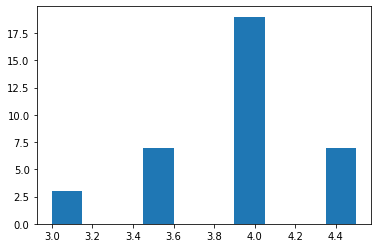

In [32]:
plt.hist(restaurants_lasvegas['stars'])

In [33]:
las_vegas_list = restaurants_lasvegas.business_id.unique().tolist()

####  Filter reviews that are only for restaurants in the restaurant subset

In [34]:
lasvegas_reviews_df = reviews_df[reviews_df['business_id'].isin(las_vegas_list)]
lasvegas_reviews_df

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
266,drJ1crfdfmuuie6vxQSUhA,tL2pS5UOmN6aAOi3Z-qFGg,XXW_OFaYQkkGOGniujZFHg,5,2014-06-06,I've been here a half a dozen times over the y...,0,0,0
320,SyvB9pp9Na0sQevs26Dq3Q,tL2pS5UOmN6aAOi3Z-qFGg,g8OnV26ywJlZpezdBnOWUQ,3,2013-04-24,After having ate at this restaurant at the M H...,2,0,0
374,UmRtEJMPe86HKVs-WYuzmg,Y76nS3L426UCz7N_1pUfUQ,yfxDa8RFOvJPQh0rNtakHA,3,2016-06-22,"There weren't many vegetarian options, and I w...",0,0,0
379,sqX-4E1wsfW9CE6-RFwKmw,Y76nS3L426UCz7N_1pUfUQ,f4x1YBxkLrZg652xt2KR5g,4,2016-06-22,"I'd been to the Hash House downtown, but not t...",0,0,0
384,hsbY0RZ2gFZiSpLtNwuBig,Y76nS3L426UCz7N_1pUfUQ,XXW_OFaYQkkGOGniujZFHg,4,2016-05-22,"I've been here twice now, and there are defini...",0,0,0
...,...,...,...,...,...,...,...,...,...
5261462,UoWhxPbbJMPG_I4BOtaV-A,AOFDB60pjiXby08lx5HHYQ,I6EDDi4-Eq_XlFghcDCUhw,3,2016-02-18,Super disappointed. I think I just had high ex...,0,0,0
5261464,pX3cQu9wns0cP2uOn5ugZA,AOFDB60pjiXby08lx5HHYQ,RESDUcs7fIiihp38-d6_6g,3,2014-12-15,Buffets will always be buffets. But some of th...,1,0,0
5261530,WdTjSIXnwvoDHy64qdCc8w,5WX0Mg2QewtJSLsU8DtzfA,XZbuPXdyA0ZtTu3AzqtQhg,5,2017-01-12,Love this place. This was my third time here a...,0,0,1
5261544,27Z-VPuN5iyHZZb-v3CH-A,1VNqisX6ppOX5bYNsoWFTA,RwMLuOkImBIqqYj4SSKSPg,5,2017-07-13,This is the best taco place we've ever been to...,0,0,0


In [35]:
# converting star ratings to binary variable
lasvegas_reviews_df['stars'] = lasvegas_reviews_df['stars'].apply(lambda x: 1 if x >= 4 else 0)
lasvegas_reviews_df

C:\Users\raych\AppData\Local\Temp\ipykernel_3952\14382051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lasvegas_reviews_df['stars'] = lasvegas_reviews_df['stars'].apply(lambda x: 1 if x >= 4 else 0)


,review_id,user_id,business_id,stars,date,text,useful,funny,cool
266,drJ1crfdfmuuie6vxQSUhA,tL2pS5UOmN6aAOi3Z-qFGg,XXW_OFaYQkkGOGniujZFHg,1,2014-06-06,I've been here a half a dozen times over the y...,0,0,0
320,SyvB9pp9Na0sQevs26Dq3Q,tL2pS5UOmN6aAOi3Z-qFGg,g8OnV26ywJlZpezdBnOWUQ,0,2013-04-24,After having ate at this restaurant at the M H...,2,0,0
374,UmRtEJMPe86HKVs-WYuzmg,Y76nS3L426UCz7N_1pUfUQ,yfxDa8RFOvJPQh0rNtakHA,0,2016-06-22,"There weren't many vegetarian options, and I w...",0,0,0
379,sqX-4E1wsfW9CE6-RFwKmw,Y76nS3L426UCz7N_1pUfUQ,f4x1YBxkLrZg652xt2KR5g,1,2016-06-22,"I'd been to the Hash House downtown, but not t...",0,0,0
384,hsbY0RZ2gFZiSpLtNwuBig,Y76nS3L426UCz7N_1pUfUQ,XXW_OFaYQkkGOGniujZFHg,1,2016-05-22,"I've been here twice now, and there are defini...",0,0,0
...,...,...,...,...,...,...,...,...,...
5261462,UoWhxPbbJMPG_I4BOtaV-A,AOFDB60pjiXby08lx5HHYQ,I6EDDi4-Eq_XlFghcDCUhw,0,2016-02-18,Super disappointed. I think I just had high ex...,0,0,0
5261464,pX3cQu9wns0cP2uOn5ugZA,AOFDB60pjiXby08lx5HHYQ,RESDUcs7fIiihp38-d6_6g,0,2014-12-15,Buffets will always be buffets. But some of th...,1,0,0
5261530,WdTjSIXnwvoDHy64qdCc8w,5WX0Mg2QewtJSLsU8DtzfA,XZbuPXdyA0ZtTu3AzqtQhg,1,2017-01-12,Love this place. This was my third time here a...,0,0,1
5261544,27Z-VPuN5iyHZZb-v3CH-A,1VNqisX6ppOX5bYNsoWFTA,RwMLuOkImBIqqYj4SSKSPg,1,2017-07-13,This is the best taco place we've ever been to...,0,0,0


### Combine reviews with business categories and attributes

In [36]:
lasvegas_reviews_df = lasvegas_reviews_df.merge(restaurants_lasvegas, how = "inner", on='business_id')
lasvegas_reviews_df

,review_id,user_id,business_id,stars_x,date,text,useful,funny,cool,name,...,Nightlife,Salad,Seafood,Thai,Vietnamese,Downtown,Eastside,Southeast,The Strip,Westside
0,drJ1crfdfmuuie6vxQSUhA,tL2pS5UOmN6aAOi3Z-qFGg,XXW_OFaYQkkGOGniujZFHg,1,2014-06-06,I've been here a half a dozen times over the y...,0,0,0,"""The Peppermill Restaurant & Fireside Lounge""",...,1.0,0.0,0.0,0.0,0.0,0,0,0,1,0
1,hsbY0RZ2gFZiSpLtNwuBig,Y76nS3L426UCz7N_1pUfUQ,XXW_OFaYQkkGOGniujZFHg,1,2016-05-22,"I've been here twice now, and there are defini...",0,0,0,"""The Peppermill Restaurant & Fireside Lounge""",...,1.0,0.0,0.0,0.0,0.0,0,0,0,1,0
2,9uu-5i7CngMzADPV4a348w,3wB-JjsUjkvdNUDRnChsVg,XXW_OFaYQkkGOGniujZFHg,1,2015-01-02,This is an interesting place. Most of it is a ...,8,4,6,"""The Peppermill Restaurant & Fireside Lounge""",...,1.0,0.0,0.0,0.0,0.0,0,0,0,1,0
3,tv6fV_ko6YKukYqYZK7bvQ,GYXEHceoLVJ00e5YuV-TAw,XXW_OFaYQkkGOGniujZFHg,0,2009-01-05,"This is not a pleasant review to write, becaus...",0,0,0,"""The Peppermill Restaurant & Fireside Lounge""",...,1.0,0.0,0.0,0.0,0.0,0,0,0,1,0
4,_uqPzQtmU0P-A854o6SmDQ,wgSwwgp-CJRL8Kpj3rx1yA,XXW_OFaYQkkGOGniujZFHg,1,2009-05-05,The best service I've had in a long time!! I h...,1,1,1,"""The Peppermill Restaurant & Fireside Lounge""",...,1.0,0.0,0.0,0.0,0.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117660,TJgo_54DnwzOMn3qD6leWA,fbtfuqOae_UDXWSAVkh-VA,3kdSl5mo9dWC4clrQjEDGg,1,2017-02-03,Big eggs benedict fan that I am...I had to com...,0,0,0,"""Egg & I""",...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1
117661,z_1Jr1-4VI7nxuiTNtqjnA,kaz6NL11d2XgmIFLfDtx_w,3kdSl5mo9dWC4clrQjEDGg,0,2017-01-30,"I had chicken fried steak, portion is small ex...",0,0,1,"""Egg & I""",...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1
117662,_0R3jIpex3S7E4svfy5kbA,jyk4whBmKIkIYYAAD89yng,3kdSl5mo9dWC4clrQjEDGg,1,2014-06-28,Great bfast after a nite of boozing. The banan...,0,0,1,"""Egg & I""",...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1
117663,tRaS0MxbXJnODyMA4ibQJg,-t4TVbzTZDDvrFIEknI3pw,3kdSl5mo9dWC4clrQjEDGg,1,2015-09-19,One of the best breakfast places I've been to....,1,0,0,"""Egg & I""",...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1


### Feature engineer users features to dataset

In [37]:
len(lasvegas_reviews_df.user_id.unique())

82018

In [38]:
users_df = pd.read_csv('yelp_user.csv')
users_df

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
1,uUzsFQn_6cXDh6rPNGbIFA,Tiffy,1,2017-03-02,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
2,mBneaEEH5EMyxaVyqS-72A,Mark,6,2015-03-13,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
3,W5mJGs-dcDWRGEhAzUYtoA,Evelyn,3,2016-09-08,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
4,4E8--zUZO1Rr1IBK4_83fg,Lisa,11,2012-07-16,None,4,0,0,0,None,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1326095,LODBIwiAcKxRi7Wz-sFsKw,Neth,1,2015-02-21,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
1326096,JpY2ozlb30z_AZCq2YX34g,Mike,1,2014-08-01,None,2,0,0,0,None,...,0,0,0,0,0,0,0,0,0,1
1326097,AU9aZSA1rAjNE5cFcZTVMA,Jalin,12,2015-11-11,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
1326098,s1BZ7-rpqb3xRKcxvArXsQ,Cindy,33,2014-06-28,None,5,0,0,0,None,...,0,0,0,0,0,1,0,0,0,0


In [39]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326100 entries, 0 to 1326099
Data columns (total 22 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   user_id             1326100 non-null  object 
 1   name                1325603 non-null  object 
 2   review_count        1326100 non-null  int64  
 3   yelping_since       1326100 non-null  object 
 4   friends             1326100 non-null  object 
 5   useful              1326100 non-null  int64  
 6   funny               1326100 non-null  int64  
 7   cool                1326100 non-null  int64  
 8   fans                1326100 non-null  int64  
 9   elite               1326100 non-null  object 
 10  average_stars       1326100 non-null  float64
 11  compliment_hot      1326100 non-null  int64  
 12  compliment_more     1326100 non-null  int64  
 13  compliment_profile  1326100 non-null  int64  
 14  compliment_cute     1326100 non-null  int64  
 15  compliment_list

#### Calculate standard deviation of stars

In [40]:
reviews_grouped_std = reviews_df.groupby('user_id')['stars'].std()

In [41]:
reviews_grouped_std = reviews_grouped_std.dropna()

In [42]:
reviews_grouped_std = reviews_grouped_std[reviews_grouped_std != 0]
reviews_grouped_std

user_id
---1lKK3aKOuomHnwAkAow    1.376859
---PLwSf5gKdIoVnyRHgBA    1.414214
---cu1hq55BP9DWVXXKHZg    1.732051
---udAKDsn0yQXmzbWQNSw    0.707107
--0kuuLmuYBe3Rmu0Iycww    1.435481
                            ...   
zzwTJAgONYCTeJia4te47g    0.577350
zzx7k7JqCQNhhqL4VJxL0A    1.414214
zzxZoMmjbUjXcWZzrE3PIw    0.816497
zzyMMeUZzKAy7KQhM7lU2w    2.828427
zzzAgDDWe4PTnJuwhi3XQQ    0.707107
Name: stars, Length: 479104, dtype: float64

In [43]:
user_std_df = pd.DataFrame({'user_id': reviews_grouped_std.index, 'stars_stddev': reviews_grouped_std.values})
user_std_df

,user_id,stars_stddev
0,---1lKK3aKOuomHnwAkAow,1.376859
1,---PLwSf5gKdIoVnyRHgBA,1.414214
2,---cu1hq55BP9DWVXXKHZg,1.732051
3,---udAKDsn0yQXmzbWQNSw,0.707107
4,--0kuuLmuYBe3Rmu0Iycww,1.435481
...,...,...
479099,zzwTJAgONYCTeJia4te47g,0.577350
479100,zzx7k7JqCQNhhqL4VJxL0A,1.414214
479101,zzxZoMmjbUjXcWZzrE3PIw,0.816497
479102,zzyMMeUZzKAy7KQhM7lU2w,2.828427


#### Calculate average of stars

In [44]:
reviews_grouped_avg = reviews_df.groupby('user_id')['stars'].mean()
user_avg_df = pd.DataFrame({'user_id': reviews_grouped_avg.index, 'stars_avg': reviews_grouped_avg.values})
user_avg_df

,user_id,stars_avg
0,---1lKK3aKOuomHnwAkAow,4.05042
1,---94vtJ_5o_nikEs6hUjg,5.00000
2,---PLwSf5gKdIoVnyRHgBA,4.00000
3,---cu1hq55BP9DWVXXKHZg,2.00000
4,---fhiwiwBYrvqhpXgcWDQ,1.00000
...,...,...
1326096,zzzPVqSxSvjzlLR3Q7wsUw,5.00000
1326097,zzzTkKLFo9CaeZnfO4TvzA,1.00000
1326098,zzzfcCWPDkg-kGVpqCKCEg,5.00000
1326099,zzzhFxwfzL56CQVnw8piTw,5.00000


In [45]:
user_std_df = user_std_df.merge(user_avg_df, how = "inner", on = 'user_id')

In [46]:
lasvegas_reviews_df = lasvegas_reviews_df.merge(user_std_df, how = "inner", on = 'user_id')

Extract out relevant columns in review dataset

In [47]:
lasvegas_reviews_df = lasvegas_reviews_df.rename(
    columns={
        'stars_x': 'stars'
    }
)
# Define relevant columns
cuisine_cols = [
    'American',
    'Asian Fusion',
    'Bakeries',
    'Bars',
    'Breakfast & Brunch',
    'British',
    'Buffets',
    'Burgers',
    'Cafes',
    'Caterers',
    'Chinese',
    'Desserts',
    'French',
    'Italian',
    'Japanese',
    'Korean',
    'Mexican',
    'Music Venues',
    'Nightlife',
    'Salad',
    'Seafood',
    'Thai',
    'Vietnamese'
]
neighborhood_cols = [
    'Downtown',
    'Eastside',
    'Southeast',
    'The Strip',
    'Westside',
]
user_cols = [
    'stars_stddev',
    'stars_avg'
]
relevant_cols = [
    'review_id',
    'user_id',
    'business_id',
    'stars',
    'date',
    'text',
    'name',
    'address'
]
# Extract relevant columns
lasvegas_reviews_df = lasvegas_reviews_df[relevant_cols + cuisine_cols + neighborhood_cols + user_cols]

#### Aggregate cusine ratios for each user

In [48]:
# Dictionary to define aggregations, we want to sum up over cuisine
agg_dict = dict([(cuisine, 'sum') for cuisine in cuisine_cols])
agg_dict['review_id'] = 'count'
# Aggregate reviews per cuisine per user
user_cuisine_features_df = lasvegas_reviews_df.groupby(
    'user_id'
).agg(
    agg_dict
)
# Calculate ratio of cuisine over total reviews
for cuisine in cuisine_cols:
    user_cuisine_features_df[cuisine + '_ratio'] = user_cuisine_features_df[cuisine] / user_cuisine_features_df['review_id']
user_cuisine_features_df = user_cuisine_features_df.drop(
    columns=['review_id']
)
# Rename columns
user_rename_dict = dict([(cuisine, 'user_' + cuisine) for cuisine in cuisine_cols] + [(cuisine + '_ratio', 'user_' + cuisine + '_ratio') for cuisine in cuisine_cols])
user_cuisine_features_df = user_cuisine_features_df.rename(
    columns=user_rename_dict
)
user_cuisine_features_df.head()

,user_American,user_Asian Fusion,user_Bakeries,user_Bars,user_Breakfast & Brunch,user_British,user_Buffets,user_Burgers,user_Cafes,user_Caterers,...,user_Italian_ratio,user_Japanese_ratio,user_Korean_ratio,user_Mexican_ratio,user_Music Venues_ratio,user_Nightlife_ratio,user_Salad_ratio,user_Seafood_ratio,user_Thai_ratio,user_Vietnamese_ratio
user_id,,,,,,,,,,,,,,,,,,,,,
---1lKK3aKOuomHnwAkAow,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.5,0.5,0.0
--3WaS23LcIXtxyFULJHTA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
--4q8EyqThydQm-eKZpS-A,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
--56mD0sm1eOogphi2FFLw,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
--66hzx80CeVZcrm4AKJtQ,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
# Merge to review table
lasvegas_reviews_user_features_df = lasvegas_reviews_df.merge(user_cuisine_features_df, how='left', on='user_id')
# Rename columns
arm_rename_dict = dict([(cuisine, 'arm_' + cuisine) for cuisine in cuisine_cols])
lasvegas_reviews_user_features_df = lasvegas_reviews_user_features_df.rename(
    columns=arm_rename_dict
)
lasvegas_reviews_user_features_df

,review_id,user_id,business_id,stars,date,text,name,address,arm_American,arm_Asian Fusion,...,user_Italian_ratio,user_Japanese_ratio,user_Korean_ratio,user_Mexican_ratio,user_Music Venues_ratio,user_Nightlife_ratio,user_Salad_ratio,user_Seafood_ratio,user_Thai_ratio,user_Vietnamese_ratio
0,drJ1crfdfmuuie6vxQSUhA,tL2pS5UOmN6aAOi3Z-qFGg,XXW_OFaYQkkGOGniujZFHg,1,2014-06-06,I've been here a half a dozen times over the y...,"""The Peppermill Restaurant & Fireside Lounge""","""2985 Las Vegas Blvd S""",1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0
1,SyvB9pp9Na0sQevs26Dq3Q,tL2pS5UOmN6aAOi3Z-qFGg,g8OnV26ywJlZpezdBnOWUQ,0,2013-04-24,After having ate at this restaurant at the M H...,"""Hash House A Go Go""","""6800 W Sahara Ave""",1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0
2,hsbY0RZ2gFZiSpLtNwuBig,Y76nS3L426UCz7N_1pUfUQ,XXW_OFaYQkkGOGniujZFHg,1,2016-05-22,"I've been here twice now, and there are defini...","""The Peppermill Restaurant & Fireside Lounge""","""2985 Las Vegas Blvd S""",1.0,0.0,...,0.0,0.0,0.0,0.2,0.0,0.2,0.0,0.0,0.0,0.2
3,WTFAWwEZd-EDLSgqbbTSSA,Y76nS3L426UCz7N_1pUfUQ,g8OnV26ywJlZpezdBnOWUQ,0,2017-04-06,I'd give this place a 3.5 if I could. The pan...,"""Hash House A Go Go""","""6800 W Sahara Ave""",1.0,0.0,...,0.0,0.0,0.0,0.2,0.0,0.2,0.0,0.0,0.0,0.2
4,UmRtEJMPe86HKVs-WYuzmg,Y76nS3L426UCz7N_1pUfUQ,yfxDa8RFOvJPQh0rNtakHA,0,2016-06-22,"There weren't many vegetarian options, and I w...","""Pho Kim Long""","""4029 Spring Mountain Rd""",0.0,0.0,...,0.0,0.0,0.0,0.2,0.0,0.2,0.0,0.0,0.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88849,3XLWrsDemRFc3R8zlrhPWA,zKSwd31uha5uwKEBnyB3ow,3kdSl5mo9dWC4clrQjEDGg,1,2017-03-24,This place is the egg-bomb! From the cute-n-se...,"""Egg & I""","""4533 W Sahara Ave, Ste 5""",1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88850,TJgo_54DnwzOMn3qD6leWA,fbtfuqOae_UDXWSAVkh-VA,3kdSl5mo9dWC4clrQjEDGg,1,2017-02-03,Big eggs benedict fan that I am...I had to com...,"""Egg & I""","""4533 W Sahara Ave, Ste 5""",1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88851,z_1Jr1-4VI7nxuiTNtqjnA,kaz6NL11d2XgmIFLfDtx_w,3kdSl5mo9dWC4clrQjEDGg,0,2017-01-30,"I had chicken fried steak, portion is small ex...","""Egg & I""","""4533 W Sahara Ave, Ste 5""",1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88852,tRaS0MxbXJnODyMA4ibQJg,-t4TVbzTZDDvrFIEknI3pw,3kdSl5mo9dWC4clrQjEDGg,1,2015-09-19,One of the best breakfast places I've been to....,"""Egg & I""","""4533 W Sahara Ave, Ste 5""",1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
#lasvegas_reviews_user_features_df.to_csv('lasvegas_reviews_all_features.csv')

## Toronto Dataset Preprocessing

In [51]:
restaurants_toronto = filter_business(business_csv, city = 'Toronto', review_count = 500, stars = 3)
restaurants_toronto

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
5191,RwRNR4z3kY-4OsFqigY5sw,"""Uncle Tetsu's Japanese Cheesecake""",Downtown Core,"""598 Bay Street""",Toronto,ON,M5G 1M5,43.655969,-79.384013,3.5,848,1,Food;Desserts;Bakeries;Japanese;Restaurants
9526,RtUvSWO_UZ8V3Wpj0n077w,"""KINKA IZAKAYA ORIGINAL""",Downtown Core,"""398 Church St""",Toronto,ON,M5B 2A2,43.660524,-79.378927,4.0,1184,1,Tapas Bars;Japanese;Nightlife;Tapas/Small Plat...
16966,O-uIEuv7JLUHajkemx_sVw,"""Beerbistro""",Downtown Core,"""18 King Street E""",Toronto,ON,M5C 1C4,43.649817,-79.377147,4.0,546,1,American (New);Pubs;Restaurants;Nightlife;Bars...
18409,mG71gQ5HWl7ut9OCN6NJKA,"""360 Restaurant""",Entertainment District,"""CN Tower, 301 Front Street W""",Toronto,ON,M5V 2T6,43.642768,-79.387100,3.5,627,1,American (New);Restaurants;Vegetarian;Canadian...
19731,mZRKH9ngRY92bI_irrHq6w,"""Richmond Station""",Downtown Core,"""1 Richmond Street W""",Toronto,ON,M5H 3W4,43.651373,-79.379285,4.5,515,1,Canadian (New);Restaurants
31522,MS-hfug4QDXqb_Mws3qlzA,"""Grand Electric""",Parkdale,"""1330 Queen Street W""",Toronto,ON,M6K 1L4,43.641675,-79.431608,4.0,586,1,Bars;Nightlife;Restaurants;Mexican
31703,DE89UdHFMCN6DtYWZuer5A,"""Hokkaido Ramen Santouka""",Ryerson,"""91 Dundas Street E""",Toronto,ON,M5B 2C8,43.656322,-79.377500,4.0,651,1,Noodles;Restaurants;Japanese;Ramen
36440,f5O7v_X_jCg2itqacRfxhg,"""Sansotei Ramen""",Downtown Core,"""179 Dundas Street W""",Toronto,ON,M5G 1Z8,43.655004,-79.386473,4.0,701,1,Ramen;Japanese;Restaurants;Noodles
40895,O1TvPrgkK2bUo5O5aSZ7lw,"""Rol San""",Chinatown,"""323 Spadina Avenue""",Toronto,ON,M5T 2E9,43.654353,-79.398313,3.5,539,1,Dim Sum;Chinese;Restaurants
49153,-av1lZI1JDY_RZN2eTMnWg,"""Salad King Restaurant""",Downtown Core,"""340 Yonge Street""",Toronto,ON,M5B 1R8,43.657648,-79.381728,3.5,808,1,Restaurants;Thai


In [52]:
restaurants_toronto.neighborhood.unique()

array(['Downtown Core', 'Entertainment District', 'Parkdale', 'Ryerson',
       'Chinatown', nan, 'Distillery District', 'Liberty Village',
       'Kensington Market', 'Financial District', 'Wychwood',
       'Queen Street West'], dtype=object)

Check for unique categories in toronto restaurants

In [53]:
restaurants_toronto.categories.tolist()

results = []

for i in restaurants_toronto.categories.tolist():
    results.extend(i.split(";"))
set(results)

{'American (New)',
 'American (Traditional)',
 'Asian Fusion',
 'Bakeries',
 'Barbeque',
 'Bars',
 'Bistros',
 'Breakfast & Brunch',
 'Canadian (New)',
 'Chinese',
 'Comfort Food',
 'Delicatessen',
 'Desserts',
 'Dim Sum',
 'Ethnic Food',
 'Event Planning & Services',
 'Food',
 'German',
 'Italian',
 'Japanese',
 'Korean',
 'Lounges',
 'Mediterranean',
 'Mexican',
 'Middle Eastern',
 'Nightlife',
 'Noodles',
 'Pubs',
 'Ramen',
 'Restaurants',
 'Sandwiches',
 'Seafood',
 'Soup',
 'Southern',
 'Specialty Food',
 'Sushi Bars',
 'Tapas Bars',
 'Tapas/Small Plates',
 'Thai',
 'Vegetarian',
 'Venues & Event Spaces',
 'Vietnamese'}

Check for toronto restaurants with NA values for categories

In [54]:
toronto_no_na_subset = restaurants_toronto[~restaurants_toronto['neighborhood'].isna()]
toronto_no_na_subset

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
5191,RwRNR4z3kY-4OsFqigY5sw,"""Uncle Tetsu's Japanese Cheesecake""",Downtown Core,"""598 Bay Street""",Toronto,ON,M5G 1M5,43.655969,-79.384013,3.5,848,1,Food;Desserts;Bakeries;Japanese;Restaurants
9526,RtUvSWO_UZ8V3Wpj0n077w,"""KINKA IZAKAYA ORIGINAL""",Downtown Core,"""398 Church St""",Toronto,ON,M5B 2A2,43.660524,-79.378927,4.0,1184,1,Tapas Bars;Japanese;Nightlife;Tapas/Small Plat...
16966,O-uIEuv7JLUHajkemx_sVw,"""Beerbistro""",Downtown Core,"""18 King Street E""",Toronto,ON,M5C 1C4,43.649817,-79.377147,4.0,546,1,American (New);Pubs;Restaurants;Nightlife;Bars...
18409,mG71gQ5HWl7ut9OCN6NJKA,"""360 Restaurant""",Entertainment District,"""CN Tower, 301 Front Street W""",Toronto,ON,M5V 2T6,43.642768,-79.387100,3.5,627,1,American (New);Restaurants;Vegetarian;Canadian...
19731,mZRKH9ngRY92bI_irrHq6w,"""Richmond Station""",Downtown Core,"""1 Richmond Street W""",Toronto,ON,M5H 3W4,43.651373,-79.379285,4.5,515,1,Canadian (New);Restaurants
31522,MS-hfug4QDXqb_Mws3qlzA,"""Grand Electric""",Parkdale,"""1330 Queen Street W""",Toronto,ON,M6K 1L4,43.641675,-79.431608,4.0,586,1,Bars;Nightlife;Restaurants;Mexican
31703,DE89UdHFMCN6DtYWZuer5A,"""Hokkaido Ramen Santouka""",Ryerson,"""91 Dundas Street E""",Toronto,ON,M5B 2C8,43.656322,-79.377500,4.0,651,1,Noodles;Restaurants;Japanese;Ramen
36440,f5O7v_X_jCg2itqacRfxhg,"""Sansotei Ramen""",Downtown Core,"""179 Dundas Street W""",Toronto,ON,M5G 1Z8,43.655004,-79.386473,4.0,701,1,Ramen;Japanese;Restaurants;Noodles
40895,O1TvPrgkK2bUo5O5aSZ7lw,"""Rol San""",Chinatown,"""323 Spadina Avenue""",Toronto,ON,M5T 2E9,43.654353,-79.398313,3.5,539,1,Dim Sum;Chinese;Restaurants
49153,-av1lZI1JDY_RZN2eTMnWg,"""Salad King Restaurant""",Downtown Core,"""340 Yonge Street""",Toronto,ON,M5B 1R8,43.657648,-79.381728,3.5,808,1,Restaurants;Thai


In [55]:
toronto_na_subset = restaurants_toronto[restaurants_toronto['neighborhood'].isna()]
toronto_na_subset

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
57854,B70iTJjcPkuYn8ouUewWgw,"""Gusto 101""",NaN,"""101 Portland Street""",Toronto,ON,M5V 2N3,43.645002,-79.400309,4.0,673,1,Italian;Restaurants
63728,e41TP5cXZqSrz50xCBJqZw,"""Insomnia Restaurant & Lounge""",NaN,"""563 Bloor Street W""",Toronto,ON,M5S 1Y6,43.665131,-79.410852,4.0,690,1,Nightlife;Bars;Breakfast & Brunch;Comfort Food...
87730,h_4dPV9M9aYaBliH1Eoeeg,"""Wvrst""",NaN,"""609 King Street W""",Toronto,ON,M5V 1M5,43.644186,-79.401015,4.0,623,1,Restaurants;Nightlife;Canadian (New);German;Bars


Three restaurants have NaN values for neighborhood. We will use the lat long values to determine the closest neighborhood from the closest restaurant, and assign that neighborhoood to the restaurants. 

#### Fill NaN neighborhoods by searching the closest neighborhood from the restaurant

In [56]:
from geopy import distance

toronto_na_dict = toronto_na_subset.to_dict('records')
toronto_no_na_dict = toronto_no_na_subset.to_dict('records')

In [57]:
# fill na values with closest neighborhood
for na_rest in toronto_na_dict:
    location = (na_rest['latitude'], na_rest['longitude'])
    na_rest['neighborhood'] = get_closest_neighborhood(toronto_no_na_dict, location)

0.5031659807313933
1.4619236228813934
0.6102705119720732


In [58]:
# convert back to datafram
restaurants_toronto = pd.DataFrame(toronto_na_dict+toronto_no_na_dict)
restaurants_toronto.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,B70iTJjcPkuYn8ouUewWgw,"""Gusto 101""",Queen Street West,"""101 Portland Street""",Toronto,ON,M5V 2N3,43.645002,-79.400309,4.0,673,1,Italian;Restaurants
1,e41TP5cXZqSrz50xCBJqZw,"""Insomnia Restaurant & Lounge""",Kensington Market,"""563 Bloor Street W""",Toronto,ON,M5S 1Y6,43.665131,-79.410852,4.0,690,1,Nightlife;Bars;Breakfast & Brunch;Comfort Food...
2,h_4dPV9M9aYaBliH1Eoeeg,"""Wvrst""",Queen Street West,"""609 King Street W""",Toronto,ON,M5V 1M5,43.644186,-79.401015,4.0,623,1,Restaurants;Nightlife;Canadian (New);German;Bars
3,RwRNR4z3kY-4OsFqigY5sw,"""Uncle Tetsu's Japanese Cheesecake""",Downtown Core,"""598 Bay Street""",Toronto,ON,M5G 1M5,43.655969,-79.384013,3.5,848,1,Food;Desserts;Bakeries;Japanese;Restaurants
4,RtUvSWO_UZ8V3Wpj0n077w,"""KINKA IZAKAYA ORIGINAL""",Downtown Core,"""398 Church St""",Toronto,ON,M5B 2A2,43.660524,-79.378927,4.0,1184,1,Tapas Bars;Japanese;Nightlife;Tapas/Small Plat...


#### Shortlist categories that we want to extract from restaurants

In [59]:
category_cols = ['American',
       'Asian Fusion', 'Bakeries', 'Bars', 'Breakfast & Brunch', 'British',
       'Buffets', 'Burgers', 'Caribbean', 'Cafes', 'Caterers', 'Chinese',
       'Desserts', 'French', 'German', 'Gluten-Free', 'Indian', 'Hawaiian',
       'Italian', 'Japanese', 'Korean', 'Latin American', 'Mediterranean',
       'Mexican', 'Music Venues', 'Nightlife', 'Seafood', 'Salad', 'Spanish',
       'Thai', 'Vegan', 'Vegetarian', 'Vietnamese', 'Canadian']

In [60]:
restaurants_toronto['categories'].apply(lambda x: x.split(";"))

0                                [Italian, Restaurants]
1     [Nightlife, Bars, Breakfast & Brunch, Comfort ...
2     [Restaurants, Nightlife, Canadian (New), Germa...
3     [Food, Desserts, Bakeries, Japanese, Restaurants]
4     [Tapas Bars, Japanese, Nightlife, Tapas/Small ...
5     [American (New), Pubs, Restaurants, Nightlife,...
6     [American (New), Restaurants, Vegetarian, Cana...
7                         [Canadian (New), Restaurants]
8               [Bars, Nightlife, Restaurants, Mexican]
9               [Noodles, Restaurants, Japanese, Ramen]
10              [Ramen, Japanese, Restaurants, Noodles]
11                      [Dim Sum, Chinese, Restaurants]
12                                  [Restaurants, Thai]
13           [Tapas/Small Plates, Mexican, Restaurants]
14    [Event Planning & Services, Canadian (New), Br...
15                      [Mexican, Restaurants, Seafood]
16    [Food, Ethnic Food, Specialty Food, Restaurant...
17    [American (New), Ramen, Asian Fusion, Rest

In [61]:
original_list = restaurants_toronto['categories'].apply(lambda x: x.split(";")).tolist()

We want the categories "American (New)" and "American (Traditional)" to be included in the category "American" as well. 

In [62]:
original_list = [[s[:-6] if s.endswith('(New)') else s for s in sub_list] for sub_list in original_list]
original_list = [[s[:-14] if s.endswith('(Traditional)') else s for s in sub_list] for sub_list in original_list]
original_list = [list(set(sub_list)) for sub_list in original_list]

In [63]:
original_list

[['Restaurants', 'Italian'],
 ['Nightlife',
  'Comfort Food',
  'Bars',
  'Breakfast & Brunch',
  'Restaurants',
  'Lounges',
  'Mediterranean'],
 ['Nightlife', 'Bars', 'Canadian', 'Restaurants', 'German'],
 ['Food', 'Desserts', 'Japanese', 'Restaurants', 'Bakeries'],
 ['Nightlife',
  'Japanese',
  'Tapas Bars',
  'Restaurants',
  'Bars',
  'Pubs',
  'Tapas/Small Plates'],
 ['Nightlife',
  'Bistros',
  'Bars',
  'Canadian',
  'Restaurants',
  'Pubs',
  'American'],
 ['American', 'Canadian', 'Restaurants', 'Vegetarian'],
 ['Canadian', 'Restaurants'],
 ['Nightlife', 'Bars', 'Restaurants', 'Mexican'],
 ['Ramen', 'Japanese', 'Restaurants', 'Noodles'],
 ['Ramen', 'Japanese', 'Restaurants', 'Noodles'],
 ['Chinese', 'Restaurants', 'Dim Sum'],
 ['Restaurants', 'Thai'],
 ['Mexican', 'Tapas/Small Plates', 'Restaurants'],
 ['Comfort Food',
  'Event Planning & Services',
  'Venues & Event Spaces',
  'Breakfast & Brunch',
  'Canadian',
  'Vegetarian',
  'Restaurants',
  'American'],
 ['Mexican', 'R

In [64]:
# filter for only categories that fall in category_cols
final_list = []
for lst in original_list:

    newlst = [x for x in lst if x in category_cols]
    final_list.append(newlst)

In [65]:
restaurants_toronto['categories'] = final_list

In [66]:
restaurants_toronto.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,B70iTJjcPkuYn8ouUewWgw,"""Gusto 101""",Queen Street West,"""101 Portland Street""",Toronto,ON,M5V 2N3,43.645002,-79.400309,4.0,673,1,[Italian]
1,e41TP5cXZqSrz50xCBJqZw,"""Insomnia Restaurant & Lounge""",Kensington Market,"""563 Bloor Street W""",Toronto,ON,M5S 1Y6,43.665131,-79.410852,4.0,690,1,"[Nightlife, Bars, Breakfast & Brunch, Mediterr..."
2,h_4dPV9M9aYaBliH1Eoeeg,"""Wvrst""",Queen Street West,"""609 King Street W""",Toronto,ON,M5V 1M5,43.644186,-79.401015,4.0,623,1,"[Nightlife, Bars, Canadian, German]"
3,RwRNR4z3kY-4OsFqigY5sw,"""Uncle Tetsu's Japanese Cheesecake""",Downtown Core,"""598 Bay Street""",Toronto,ON,M5G 1M5,43.655969,-79.384013,3.5,848,1,"[Desserts, Japanese, Bakeries]"
4,RtUvSWO_UZ8V3Wpj0n077w,"""KINKA IZAKAYA ORIGINAL""",Downtown Core,"""398 Church St""",Toronto,ON,M5B 2A2,43.660524,-79.378927,4.0,1184,1,"[Nightlife, Japanese, Bars]"


Now, the categories column is a list of categories, shortlisted from category_cols.

(array([3., 2., 7., 4., 1., 1., 1., 1., 1., 3.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

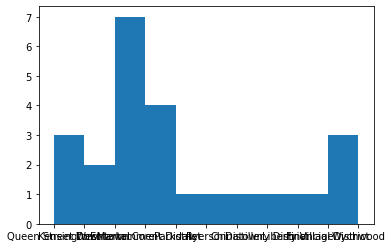

In [67]:
plt.hist(restaurants_toronto.neighborhood)

#### Convert categories column to dummy variables

In [68]:
dummy_df = pd.get_dummies(restaurants_toronto['categories'].apply(pd.Series).stack()).sum(level =0)

C:\Users\raych\AppData\Local\Temp\ipykernel_3952\2448049936.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dummy_df = pd.get_dummies(restaurants_toronto['categories'].apply(pd.Series).stack()).sum(level =0)
C:\Users\raych\AppData\Local\Temp\ipykernel_3952\2448049936.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  dummy_df = pd.get_dummies(restaurants_toronto['categories'].apply(pd.Series).stack()).sum(level =0)


In [69]:
restaurants_toronto = pd.concat([restaurants_toronto, dummy_df], axis = 1).drop(columns = 'categories')
restaurants_toronto.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,...,Italian,Japanese,Korean,Mediterranean,Mexican,Nightlife,Seafood,Thai,Vegetarian,Vietnamese
0,B70iTJjcPkuYn8ouUewWgw,"""Gusto 101""",Queen Street West,"""101 Portland Street""",Toronto,ON,M5V 2N3,43.645002,-79.400309,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,e41TP5cXZqSrz50xCBJqZw,"""Insomnia Restaurant & Lounge""",Kensington Market,"""563 Bloor Street W""",Toronto,ON,M5S 1Y6,43.665131,-79.410852,4.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,h_4dPV9M9aYaBliH1Eoeeg,"""Wvrst""",Queen Street West,"""609 King Street W""",Toronto,ON,M5V 1M5,43.644186,-79.401015,4.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,RwRNR4z3kY-4OsFqigY5sw,"""Uncle Tetsu's Japanese Cheesecake""",Downtown Core,"""598 Bay Street""",Toronto,ON,M5G 1M5,43.655969,-79.384013,3.5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,RtUvSWO_UZ8V3Wpj0n077w,"""KINKA IZAKAYA ORIGINAL""",Downtown Core,"""398 Church St""",Toronto,ON,M5B 2A2,43.660524,-79.378927,4.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Remove NAN values for restaurants

In [70]:
restaurants_toronto.dropna(inplace = True)

Convert neighborhood to dummies

In [71]:
neighborhood_dummies = pd.get_dummies(restaurants_toronto.neighborhood,drop_first=True)
neighborhood_dummies.head()

,Distillery District,Downtown Core,Entertainment District,Financial District,Kensington Market,Liberty Village,Parkdale,Queen Street West,Ryerson,Wychwood
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0


In [72]:
neighborhood_dummies.columns.to_list()

['Distillery District',
 'Downtown Core',
 'Entertainment District',
 'Financial District',
 'Kensington Market',
 'Liberty Village',
 'Parkdale',
 'Queen Street West',
 'Ryerson',
 'Wychwood']

In [73]:
# merge back dummies with dataset
restaurants_toronto = pd.concat([restaurants_toronto, neighborhood_dummies], axis = 1)
restaurants_toronto.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,...,Distillery District,Downtown Core,Entertainment District,Financial District,Kensington Market,Liberty Village,Parkdale,Queen Street West,Ryerson,Wychwood
0,B70iTJjcPkuYn8ouUewWgw,"""Gusto 101""",Queen Street West,"""101 Portland Street""",Toronto,ON,M5V 2N3,43.645002,-79.400309,4.0,...,0,0,0,0,0,0,0,1,0,0
1,e41TP5cXZqSrz50xCBJqZw,"""Insomnia Restaurant & Lounge""",Kensington Market,"""563 Bloor Street W""",Toronto,ON,M5S 1Y6,43.665131,-79.410852,4.0,...,0,0,0,0,1,0,0,0,0,0
2,h_4dPV9M9aYaBliH1Eoeeg,"""Wvrst""",Queen Street West,"""609 King Street W""",Toronto,ON,M5V 1M5,43.644186,-79.401015,4.0,...,0,0,0,0,0,0,0,1,0,0
3,RwRNR4z3kY-4OsFqigY5sw,"""Uncle Tetsu's Japanese Cheesecake""",Downtown Core,"""598 Bay Street""",Toronto,ON,M5G 1M5,43.655969,-79.384013,3.5,...,0,1,0,0,0,0,0,0,0,0
4,RtUvSWO_UZ8V3Wpj0n077w,"""KINKA IZAKAYA ORIGINAL""",Downtown Core,"""398 Church St""",Toronto,ON,M5B 2A2,43.660524,-79.378927,4.0,...,0,1,0,0,0,0,0,0,0,0


(array([ 1.,  0.,  0.,  5.,  0.,  0., 13.,  0.,  0.,  4.]),
 array([3.  , 3.15, 3.3 , 3.45, 3.6 , 3.75, 3.9 , 4.05, 4.2 , 4.35, 4.5 ]),
 <BarContainer object of 10 artists>)

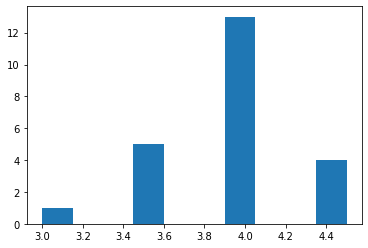

In [74]:
plt.hist(restaurants_toronto['stars'])

In [75]:
toronto_list = restaurants_toronto.business_id.unique().tolist()

####  Filter reviews that are only for restaurants in the restaurant subset

In [76]:
toronto_reviews_df = reviews_df[reviews_df['business_id'].isin(toronto_list)]
toronto_reviews_df

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
13,lsoSqIrrDbQvWpMvsSj2xw,u0LXt3Uea_GidxRW1xcsfg,RtUvSWO_UZ8V3Wpj0n077w,3,2012-12-03,Wanted to check out this place due to all the ...,2,1,1
19,WYDFJOBOl7cycd7gN-c_xA,u0LXt3Uea_GidxRW1xcsfg,zgQHtqX0gqMw1nlBZl2VnQ,1,2012-10-30,really excited to hear of this restaurant comi...,9,2,1
28,Enuk_DJbK0JPmgbFU8ePKw,u0LXt3Uea_GidxRW1xcsfg,N93EYZy9R0sdlEvubu94ig,3,2012-09-23,"Not sure what the hype is, but decided to give...",0,0,0
109,f17tpJXCwTE0M137d9yX6g,nOTl4aPC4tKHK35T3bNauQ,zgQHtqX0gqMw1nlBZl2VnQ,2,2013-10-19,"While I really enjoyed the noodles, their sign...",2,1,0
987,o2T_QEHsUPcdVrHBExmdfg,BytRWk8X1OelSgwwfXd8Aw,e41TP5cXZqSrz50xCBJqZw,5,2016-03-15,The 5-star rating goes to their home fries! If...,0,0,0
...,...,...,...,...,...,...,...,...,...
5259041,Jq3HfwZG3VSwV1xyZuxZjg,icDRgopfmkx_7S1wLeUNnw,r_BrIgzYcwo1NAuG9dLbpg,5,2016-08-03,This is soo annoying http:\/\/VisitEarnings.co...,0,0,0
5259135,DC4rkzSceiOcC-9k3lrJYQ,IV2ww2NsCbZmm-ZDNT-sgQ,e41TP5cXZqSrz50xCBJqZw,5,2016-11-28,One of my favourite spots in Annex. They have ...,0,0,0
5259251,I5HOJKHWAoKA8He9WjyW2w,iBsBBmFGGg_SS06Iz4Hyjg,r_BrIgzYcwo1NAuG9dLbpg,4,2014-09-01,This place is a treat! I've tried sabai sabai ...,1,0,0
5259384,07tgtsglJjaVv9SpQCqh9w,gsDU_aA70aX3oP9EwJiuTw,r_BrIgzYcwo1NAuG9dLbpg,3,2015-12-01,A little bit too loud and hipster-y for my tas...,0,0,0


In [77]:
toronto_reviews_df['stars'] = toronto_reviews_df['stars'].apply(lambda x: 1 if x >= 4 else 0)
toronto_reviews_df

C:\Users\raych\AppData\Local\Temp\ipykernel_3952\3064850170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toronto_reviews_df['stars'] = toronto_reviews_df['stars'].apply(lambda x: 1 if x >= 4 else 0)


,review_id,user_id,business_id,stars,date,text,useful,funny,cool
13,lsoSqIrrDbQvWpMvsSj2xw,u0LXt3Uea_GidxRW1xcsfg,RtUvSWO_UZ8V3Wpj0n077w,0,2012-12-03,Wanted to check out this place due to all the ...,2,1,1
19,WYDFJOBOl7cycd7gN-c_xA,u0LXt3Uea_GidxRW1xcsfg,zgQHtqX0gqMw1nlBZl2VnQ,0,2012-10-30,really excited to hear of this restaurant comi...,9,2,1
28,Enuk_DJbK0JPmgbFU8ePKw,u0LXt3Uea_GidxRW1xcsfg,N93EYZy9R0sdlEvubu94ig,0,2012-09-23,"Not sure what the hype is, but decided to give...",0,0,0
109,f17tpJXCwTE0M137d9yX6g,nOTl4aPC4tKHK35T3bNauQ,zgQHtqX0gqMw1nlBZl2VnQ,0,2013-10-19,"While I really enjoyed the noodles, their sign...",2,1,0
987,o2T_QEHsUPcdVrHBExmdfg,BytRWk8X1OelSgwwfXd8Aw,e41TP5cXZqSrz50xCBJqZw,1,2016-03-15,The 5-star rating goes to their home fries! If...,0,0,0
...,...,...,...,...,...,...,...,...,...
5259041,Jq3HfwZG3VSwV1xyZuxZjg,icDRgopfmkx_7S1wLeUNnw,r_BrIgzYcwo1NAuG9dLbpg,1,2016-08-03,This is soo annoying http:\/\/VisitEarnings.co...,0,0,0
5259135,DC4rkzSceiOcC-9k3lrJYQ,IV2ww2NsCbZmm-ZDNT-sgQ,e41TP5cXZqSrz50xCBJqZw,1,2016-11-28,One of my favourite spots in Annex. They have ...,0,0,0
5259251,I5HOJKHWAoKA8He9WjyW2w,iBsBBmFGGg_SS06Iz4Hyjg,r_BrIgzYcwo1NAuG9dLbpg,1,2014-09-01,This place is a treat! I've tried sabai sabai ...,1,0,0
5259384,07tgtsglJjaVv9SpQCqh9w,gsDU_aA70aX3oP9EwJiuTw,r_BrIgzYcwo1NAuG9dLbpg,0,2015-12-01,A little bit too loud and hipster-y for my tas...,0,0,0


### Combine reviews with business categories and attributes

In [78]:
toronto_reviews_df = toronto_reviews_df.merge(restaurants_toronto, how = "inner", on='business_id')
toronto_reviews_df

,review_id,user_id,business_id,stars_x,date,text,useful,funny,cool,name,...,Distillery District,Downtown Core,Entertainment District,Financial District,Kensington Market,Liberty Village,Parkdale,Queen Street West,Ryerson,Wychwood
0,lsoSqIrrDbQvWpMvsSj2xw,u0LXt3Uea_GidxRW1xcsfg,RtUvSWO_UZ8V3Wpj0n077w,0,2012-12-03,Wanted to check out this place due to all the ...,2,1,1,"""KINKA IZAKAYA ORIGINAL""",...,0,1,0,0,0,0,0,0,0,0
1,wOeJmJvQqvWM_hk2Ao2FLQ,kaF1l8dA7q-qL8ds1KUedQ,RtUvSWO_UZ8V3Wpj0n077w,1,2015-03-03,its delicious. its loud. its funny. seems like...,1,1,1,"""KINKA IZAKAYA ORIGINAL""",...,0,1,0,0,0,0,0,0,0,0
2,6TPQNYqfragIrimGFKK7_g,AQJauQ3Q8aeEQc9DHzcpXg,RtUvSWO_UZ8V3Wpj0n077w,1,2017-05-20,Love this place! If I ever have international ...,0,0,0,"""KINKA IZAKAYA ORIGINAL""",...,0,1,0,0,0,0,0,0,0,0
3,YSNO1rTbyCmmuKpgbmCUCQ,G3civyLatxrzYk0lln3MUQ,RtUvSWO_UZ8V3Wpj0n077w,1,2017-08-29,This place can accumulate some line up so come...,0,0,0,"""KINKA IZAKAYA ORIGINAL""",...,0,1,0,0,0,0,0,0,0,0
4,hGMsoRk2nbGf0o3dV-_eOA,MPi7IfzQtXW3PfSNAbzO-A,RtUvSWO_UZ8V3Wpj0n077w,0,2013-05-08,Came here with a few friends right after my la...,0,0,1,"""KINKA IZAKAYA ORIGINAL""",...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17359,_qFB1ASgVHUsnGc-XRv0Ow,FVx3h7E0ut7XByoEPFyvJw,a8pmtlVKf7NiSLI-4KejIw,1,2017-10-03,Very nice restaurant....and ask for keziah ......,0,0,0,"""El Catrin Destileria""",...,1,0,0,0,0,0,0,0,0,0
17360,3YauutbUaoKRVKtRNj87_Q,AhhwdUW8utwJSzG3UCb8nw,a8pmtlVKf7NiSLI-4KejIw,1,2013-08-21,"We had the guacamole, seafood burrito, taco Ba...",0,0,0,"""El Catrin Destileria""",...,1,0,0,0,0,0,0,0,0,0
17361,BNzkup-etLnvp1hnEG4fxw,TJ-lPouEMb0i8c2wpl8CpQ,a8pmtlVKf7NiSLI-4KejIw,0,2013-12-05,My boyfriend and I wandered in as we were stuc...,1,0,0,"""El Catrin Destileria""",...,1,0,0,0,0,0,0,0,0,0
17362,2zt777d4BjDuyKjGkTQLUw,UoNEitmZyw8uw_MXDLjo9w,a8pmtlVKf7NiSLI-4KejIw,1,2016-10-31,Amazing decoration - great ambiance. A Mexican...,0,0,1,"""El Catrin Destileria""",...,1,0,0,0,0,0,0,0,0,0


### Feature engineer users features to dataset

In [79]:
len(toronto_reviews_df.user_id.unique())

11293

#### Calculate standard deviation of stars

In [80]:
toronto_reviews_df = toronto_reviews_df.merge(user_std_df, how = "inner", on = 'user_id')

In [81]:
toronto_reviews_df.neighborhood.unique().tolist()

['Downtown Core',
 'Financial District',
 'Queen Street West',
 'Kensington Market',
 'Wychwood',
 'Entertainment District',
 'Parkdale',
 'Ryerson',
 'Distillery District',
 'Liberty Village',
 'Chinatown']

Extract out relevant columns in review dataset

In [82]:
toronto_reviews_df = toronto_reviews_df.rename(
    columns={
        'stars_x': 'stars'
    }
)
# Define relevant columns
cuisine_cols = [
    'American',
    'Asian Fusion',
    'Bakeries',
    'Bars',
    'Breakfast & Brunch',
    'British',
    'Buffets',
    'Burgers',
    'Cafes',
    'Caterers',
    'Chinese',
    'Desserts',
    'French',
    'Italian',
    'Japanese',
    'Korean',
    'Mexican',
    'Music Venues',
    'Nightlife',
    'Salad',
    'Seafood',
    'Thai',
    'Vietnamese'
]
remove_cols = ['British', 'Buffets', 'Burgers', 'Cafes', 'Caterers', 'French', 'Music Venues', 'Salad']
cuisine_cols = [x for x in cuisine_cols if x not in remove_cols]

neighborhood_cols = ['Downtown Core',
 'Financial District',
 'Queen Street West',
 'Kensington Market',
 'Wychwood',
 'Entertainment District',
 'Parkdale',
 'Ryerson',
 'Distillery District',
 'Liberty Village',]



user_cols = [
    'stars_stddev',
    'stars_avg'
]
relevant_cols = [
    'review_id',
    'user_id',
    'business_id',
    'stars',
    'date',
    'text',
    'name',
    'address'
]
# Extract relevant columns
toronto_reviews_df = toronto_reviews_df[relevant_cols + cuisine_cols + neighborhood_cols + user_cols]

#### Aggregate cusine ratios for each user

In [86]:
# Merge to review table
toronto_reviews_user_features_df = toronto_reviews_df.merge(user_cuisine_features_df, how='left', on='user_id')
# Rename columns
arm_rename_dict = dict([(cuisine, 'arm_' + cuisine) for cuisine in cuisine_cols])
toronto_reviews_user_features_df = toronto_reviews_user_features_df.rename(
    columns=arm_rename_dict
)
toronto_reviews_user_features_df

,review_id,user_id,business_id,stars,date,text,name,address,arm_American,arm_Asian Fusion,...,user_Italian_ratio,user_Japanese_ratio,user_Korean_ratio,user_Mexican_ratio,user_Music Venues_ratio,user_Nightlife_ratio,user_Salad_ratio,user_Seafood_ratio,user_Thai_ratio,user_Vietnamese_ratio
0,lsoSqIrrDbQvWpMvsSj2xw,u0LXt3Uea_GidxRW1xcsfg,RtUvSWO_UZ8V3Wpj0n077w,0,2012-12-03,Wanted to check out this place due to all the ...,"""KINKA IZAKAYA ORIGINAL""","""398 Church St""",0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,WYDFJOBOl7cycd7gN-c_xA,u0LXt3Uea_GidxRW1xcsfg,zgQHtqX0gqMw1nlBZl2VnQ,0,2012-10-30,really excited to hear of this restaurant comi...,"""Momofuku Noodle Bar""","""190 University Avenue, Ground Floor""",1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Enuk_DJbK0JPmgbFU8ePKw,u0LXt3Uea_GidxRW1xcsfg,N93EYZy9R0sdlEvubu94ig,0,2012-09-23,"Not sure what the hype is, but decided to give...","""Banh Mi Boys""","""392 Queen Street W""",0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6TPQNYqfragIrimGFKK7_g,AQJauQ3Q8aeEQc9DHzcpXg,RtUvSWO_UZ8V3Wpj0n077w,1,2017-05-20,Love this place! If I ever have international ...,"""KINKA IZAKAYA ORIGINAL""","""398 Church St""",0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,YSNO1rTbyCmmuKpgbmCUCQ,G3civyLatxrzYk0lln3MUQ,RtUvSWO_UZ8V3Wpj0n077w,1,2017-08-29,This place can accumulate some line up so come...,"""KINKA IZAKAYA ORIGINAL""","""398 Church St""",0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15568,kZpBQklXyBIp6XE2rfnJZw,gLC_XurJw_kxfVuB8RQoww,a8pmtlVKf7NiSLI-4KejIw,0,2015-10-27,"Loved the ambience and atmosphere, but mediocr...","""El Catrin Destileria""","""18 Tank House Lane""",0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15569,znu22mY8TN33lGVng3EQ5w,b1kPR6MsfDvSbxecVsKbeQ,a8pmtlVKf7NiSLI-4KejIw,1,2014-07-30,Although this place is a little too hoity toit...,"""El Catrin Destileria""","""18 Tank House Lane""",0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15570,k17qB4nXpTFDCbOadUVuQg,agqWketq-FhYwVmRyli4jA,a8pmtlVKf7NiSLI-4KejIw,1,2017-09-17,THIS PLACE IS AMAZING. Can't believe it was my...,"""El Catrin Destileria""","""18 Tank House Lane""",0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15571,3YauutbUaoKRVKtRNj87_Q,AhhwdUW8utwJSzG3UCb8nw,a8pmtlVKf7NiSLI-4KejIw,1,2013-08-21,"We had the guacamole, seafood burrito, taco Ba...","""El Catrin Destileria""","""18 Tank House Lane""",0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
#toronto_reviews_user_features_df.to_csv('toronto_reviews_all_features.csv')